# ML/DL for Everyone

### 출처

- 모두를 위한 딥러닝 시즌2
- 링크: [모두를 위한 딥러닝 시즌2](https://www.youtube.com/watch?v=7eldOrjQVi0&list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

<br/>

## Perceptron

Perceptron이란 인공신경망의 한 종류로 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안했다. 다수의 입력으로부터 하나의 결과를 내보내는 알고리즘이다.

<br/>

<hr/>

### Neuron

인공신경망은 동물의 신경계, 특히 뉴런의 동작 방식을 본 떠 만든 모델이다. 뉴런은 뇌에서 신호를 서로 주고받는 역할을 한다. 뉴런의 동작방식은 단순하다. 신호가 수상돌기(dendrite)로 들어왔을 때, 신호의 총 크기가 한계점(threshold)를 넘어가면 뉴런이 활성화되어 신호가 다음 뉴런으로 전파가 되지만 만약 넘지 못하면 전파가 일어나지 않는 구조이다.

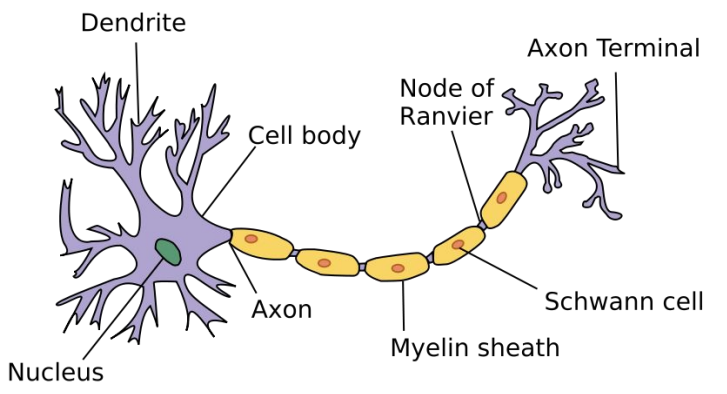

<br/>

<hr/>

### Perceptron

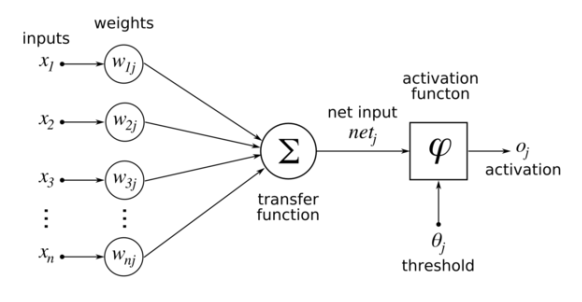

Perceptron은 어떤 입력 X가 들어왔을 때, 입력과 가중치(weight)를 곱한다. 그리고 이 가중치들의 합과 Bias를 더해 출력(output)을 생성한다. 이 초기 출력을 활성함수(ex-시그모이드, ReLu)에 적용시켜 최종 출력이 일어나게 된다.

<br/>

Perceptron은 Linear classfier를 위해 고안된 모델이다. 1957년에 제안될 당시에는 AND와 OR 문제를 해결하기 위해 만들어졌다.

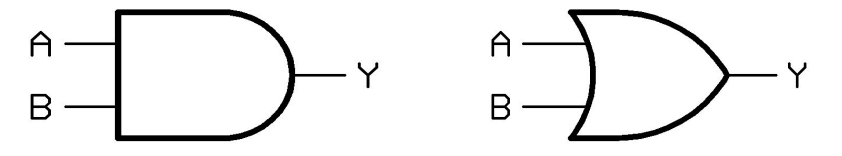

#### AND 연산

|A|B|A $\cap$ B|
|:--:|:--:|:--:|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|


#### OR 연산

|A|B|A $\cup$ B|
|:--:|:--:|:--:|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|1|

<br/>

아래와 같이 Perceptron으로 AND와 OR문제를 해결할 수 있다.

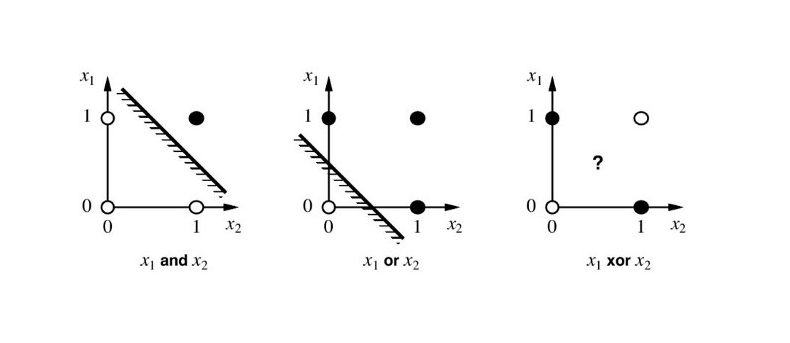

<br/>

그러나 마빈 리 민스키(Marvin Lee Minsky)가 1개의 Layer로는 XOR문제를 풀 수 없다는 것을 증명하면서, multilayer를 쌓아야만 XOR 문제를 풀 수 있다는 것을 알아낸다. 그러나 당시에는 multilayer의 가중치를 학습할 수 있는 기법이 없었기 때문에 해결할 수 없었다. 지금은 역전파(Back Propagation)를 알아냈기 때문에 multilayer의 가중치를 학습시킬 수 있다.

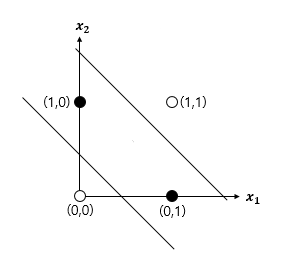

<br/>

<hr/>

### XOR 문제 코드

- 1 layer 기반의 XOR 문제 코드이다.

- 어느순간 loss 값이 전혀 줄어들지 않고 0.6931475400924683에 고정되어 있는데, 이것의 의미는 학습이 제대로 되지 않는다는 의미이다.

- 한 개의 layer로는 해결되지 않는 것을 알 수 있다.

In [3]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

# nn layers
linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()
model = torch.nn.Sequential(linear, sigmoid).to(device)

# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

# 만 번 정도 학습을 진행
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)
    
    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print(step, cost.item())

0 0.7273974418640137
100 0.6931475400924683
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [6]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy()) 
    print('Correct: ', predicted.detach().cpu().numpy())
    print('Accuracy: ', accuracy.item())


Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
Correct:  [[0.]
 [0.]
 [0.]
 [0.]]
Accuracy:  0.5
